<a href="https://colab.research.google.com/github/riphunter7001x/MultiModal_RAG/blob/main/MultiModal_RAG_with_llamaIndex_and_LanceDB_using_Gemini_pro_vision(video_processing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MultiModal RAG App for Video Processing With LlamaIndex and LanceDB**

### 1. llamaindex framework
### 2. Lancedb Vector DataBase
### 3. Google-gemini-pro-vision


# **Steps Need to follow:**
#### 1. Download video from YouTube, process and store it.

#### 2. Build Multi-Modal index and vector store for both texts and images.

#### 3. Retrieve relevant images and context, use both to augment the prompt.

#### 4. Using Multimodal llm for reasoning the correlations between the input query and augmented data and generating final response.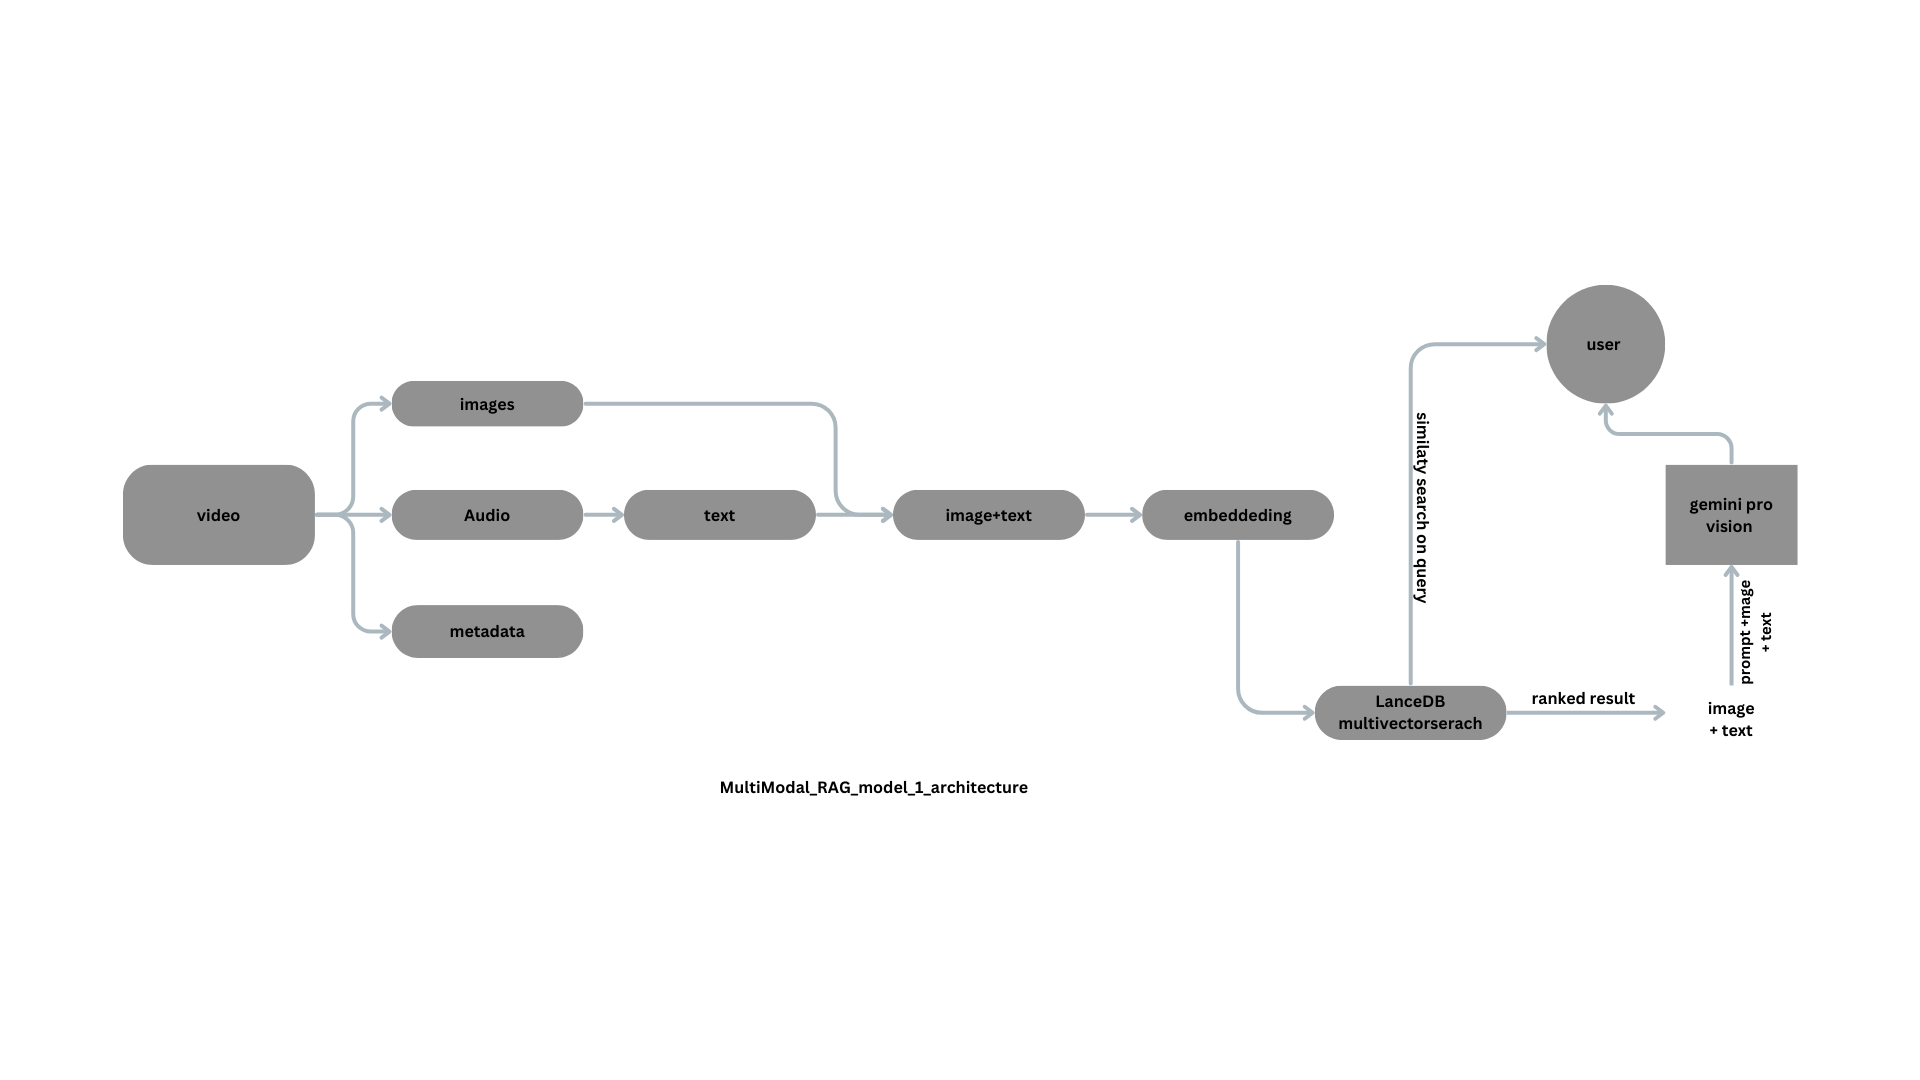

In [1]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-embeddings-clip
%pip install git+https://github.com/openai/CLIP.git
!pip install llama-index-readers-file

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ltjlwi5x
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ltjlwi5x
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=0e0cf942c5822b76df0c249ef942dd857626a973439566a2ee2386c9bac70d89
  Stored in directory: /tmp/pip-ephem-wheel-cache-tsznc3cv/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 9.9 MB/s eta 0:00:00


In [2]:
%pip install llama_index
%pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801358 sha256=0aff411fcdac03d266aa291bd0937ed772852325456d0176133e2e0dedfb2ad6
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper


In [3]:
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install ftfy regex tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-embeddings-clip 0.1.5 requires pillow<11.0.0,>=10.2.0, but you have pillow 10.0.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 43.5 MB/s eta 0:00:00


ffmpeg-library enables you to use FFmpeg in Python to manipulate various media files for different purposes like building comprehensive multimedia applications, preprocessing media files.

MoviePy is a Python library for video editing, enabling cutting, concatenations, title insertions, video compositing, and effects like animations or color grading.

Pytube is a Python library used for downloading videos from YouTube. It supports downloading in various formats, resolutions, and also direct audio extraction.


Pydub is a Python library for audio manipulation, enabling easy loading,
editing, and exporting of audio files in various formats with minimal code.

The SpeechRecognition library in Python allows you to convert spoken language into text using various engines and APIs, such as Google Speech Recognition, IBM Speech to Text, etc.


SoundFile is a Python library for reading from and writing to audio files, supporting many formats through the libsndfile library, ideal for high-quality audio processing.

FTFY (Fix Text For You) is a Python library that fixes broken Unicode text and mojibake (garbled text due to encoding issues), making text legible again.

OpenAI Whisper is a robust, multilingual speech recognition model developed by OpenAI. It converts speech into text and supports various languages with high accuracy.

pprint is a Python module that provides a capability to "pretty-print" complex data structures in a well-formatted and more readable way than the basic print function.

In [4]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import os
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [5]:
import os
print(os.getcwd())

/content


In [73]:
video_url="https://youtu.be/TXaRvGshcM8?si=K8VB5Chhykdm2YLx"

In [74]:
output_video_path = "/content/video_data/"

In [75]:
# from the video i am going to collect images,audio,text
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

IsADirectoryError: [Errno 21] Is a directory: '/content/mixed_data'

In [76]:
!mkdir mixed_data

mkdir: cannot create directory ‘mixed_data’: File exists


In [78]:
filepath=output_video_path + "input_vid.mp4"
print(filepath)

/content/video_data/input_vid.mp4


In [79]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}

  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
  return metadata

In [80]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.4
  )

In [81]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [82]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [83]:
video_url

'https://youtu.be/TXaRvGshcM8?si=K8VB5Chhykdm2YLx'

In [84]:
output_video_path

'/content/video_data/'

In [85]:
metadata_vid = download_video(video_url, output_video_path)

In [86]:
metadata_vid

{'Author': 'Think School',
 'Title': 'How Did Adani Group Bounce-back from the Hindenburg Fiasco? Detailed Business Case Study',
 'Views': 447863}

In [87]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [88]:
filepath

'/content/video_data/input_vid.mp4'

In [89]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [90]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [91]:
text_data=audio_to_text(output_audio_path)

In [92]:
text_data

" Hi everybody, on 25th of January 2023, the Hindenburg Report came out with some serious allegations about the market cap of the Adani Group companies. And then we all know what happened. Adani Group, Adani Group, a last week's report from Hindenburg Research that accused Adani of fraud and stock price manipulation. Adani Group companies continued to slide for a third straight session. The Adani Group says it's exploring legal action against the US short seller, Hindenburg Research. He says Hindenburg is making an attack not just on the company, he's also making an attack on India and its growth ambitions. In just 10 days, the Adani Group lost 110 billion dollars in value and Godham Adani's fortune went down from 121 billion dollars to 61 billion dollars. And the stock market of India was in complete chaos. But you know what, in the next one year, something magical happened and Godham Adani's total wealth went from 37.7 billion dollars a year back to 100 billion dollars again. And whi

In [93]:
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()

Text data saved to file


In [94]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [ ]:
#process the video
#image
#text

In [25]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [26]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [95]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")

image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [96]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [97]:
output_folder

'/content/mixed_data/'

In [35]:
! pip install llama-index-embeddings-huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.2/853.2 kB 11.8 MB/s eta 0:00:00


In [98]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import Settings

Settings.embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)

  warnings.warn(



In [99]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [100]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

In [101]:
retriever_engine=index.as_retriever(similarity_top_k=3, image_similarity_top_k=5)

In [40]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [102]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [104]:

query="can you  tell about share pledgeing"

In [115]:
img,text=retrieve(retriever_engine,query)

**Node ID:** a38ccd2c-8c81-47d8-be33-63b9efeb2a4a<br>**Similarity:** 0.5723744034767151<br>**Text:** But the question we hear is, in spite of such a big setback, how did the Adani's comeback on track and what exactly was their business strategy? Well, to understand this comeback strategy, we must ...<br>

**Node ID:** 6aead406-b5b8-45b1-8b1a-3a30d3dd2396<br>**Similarity:** 0.523059606552124<br>**Text:** Because this cultivation of a meaningful relationship with the right people beyond transactions can help you get an extraordinary advantage. In this case, the Adani's had investment houses from Qat...<br>

**Node ID:** f26b7e67-02b0-45cc-a217-8127d7e881a2<br>**Similarity:** 0.488447904586792<br>**Text:** And apart from these 2 major allegations, there were several other allegations like the Adani Group owning shell companies in tax events. And all of these allegations have very easily been addresse...<br>

In [106]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

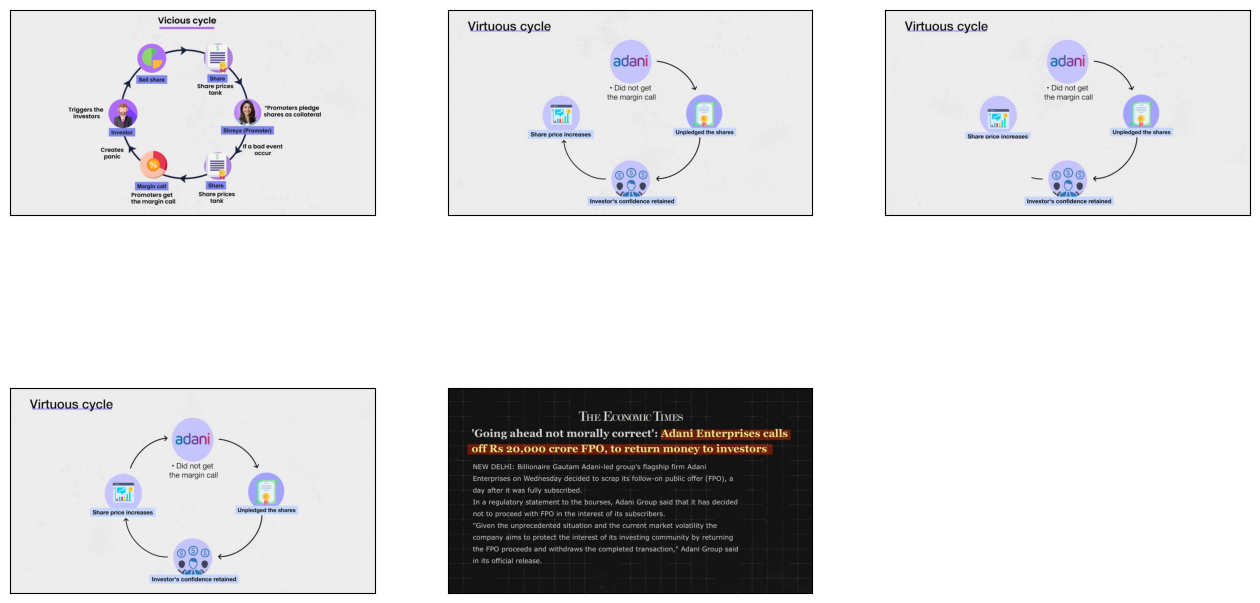

In [138]:
plot_images(img)

In [63]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [64]:
img

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png']

In [145]:
import json
metadata_str=json.dumps(metadata_vid)

In [146]:
query_str="what is Virtuous cycle in adnani ?"

In [147]:
img,text=retrieve(retriever_engine,query_str)

**Node ID:** 4db173c6-26d8-4780-821b-d73d1ede9075<br>**Similarity:** 0.44285571575164795<br>**Text:** And eventually the vicious cycle continues. But you know what guys? In case of the Anani's before the cycle could even start, they very smartly pulled themselves out of this vicious cycle and inste...<br>

**Node ID:** 6aead406-b5b8-45b1-8b1a-3a30d3dd2396<br>**Similarity:** 0.393459677696228<br>**Text:** Because this cultivation of a meaningful relationship with the right people beyond transactions can help you get an extraordinary advantage. In this case, the Adani's had investment houses from Qat...<br>

**Node ID:** a38ccd2c-8c81-47d8-be33-63b9efeb2a4a<br>**Similarity:** 0.3603115677833557<br>**Text:** But the question we hear is, in spite of such a big setback, how did the Adani's comeback on track and what exactly was their business strategy? Well, to understand this comeback strategy, we must ...<br>

In [148]:
context_str = "".join(text)

In [149]:
image_documents = SimpleDirectoryReader( input_files=img).load_data()

In [53]:
%pip install llama-index-multi-modal-llms-gemini
%pip install llama-index-vector-stores-qdrant
%pip install llama-index-embeddings-gemini
%pip install llama-index-llms-gemini

  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 10.0.1
    Uninstalling Pillow-10.0.1:
      Successfully uninstalled Pillow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.0 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.27.0 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.2

In [54]:
!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

INFO: pip is looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.1 MB/s eta 0:00:00
  Attempting uninstall: grpcio-tools
    Found existing installation: grpcio-tools 1.64.0
    Uninstalling grpcio-tools-1.64.0:
      Successfully uninstalled grpcio-tools-1.64.0


In [58]:
# Import Colab Secrets userdata module
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')



In [56]:

from llama_index.multi_modal_llms.gemini import GeminiMultiModal

In [60]:
gemini_mm_llm = GeminiMultiModal(model_name="models/gemini-pro-vision", api_key=GOOGLE_API_KEY, max_new_tokens=1500)

In [151]:
result=gemini_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        query_str=query_str,context_str=context_str,metadata_str=metadata_str
    ),
    image_documents=image_documents,
)

ConnectionError: ('Connection aborted.', TimeoutError('timed out'))

In [ ]:
pprint(result.text)

'{"Author": "Think School", "Title": "How Did Adani Group Bounce-back from the Hindenburg Fiasco? Detailed Business Case Study", "Views": 447863}'

In [70]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)